# S-Cubes usage example

In [ ]:
from splusdata.scubes.core import SCubes

OBJNAME = 'NGC1344'
RA = 52.08196       # DEG
DEC = -31.06817     # DEG

FIELD='SPLUS-s24s34'
STAMP_SIZE = 1000    # PIX
VERBOSITY_LEVEL = 1

scube = SCubes(RA, DEC, FIELD, size=STAMP_SIZE, verbose=VERBOSITY_LEVEL)  #, username='XXX', password='YYY')
scube.create_cube(objname=OBJNAME, redo=True)

###
### SCubes.create_cube() write_fits parameter defaults to false. 
### One can write the output FITS after create_cube() call using:
###
#cubepath = f'{OBJNAME}_cube.fits'
#scube.write(cubepath, overwrite=True)

NGC1344 @ SPLUS-s24s34 - Downloading:   0%|          | 0/12 [00:00<?, ?it/s]

[2025-08-21T21:26:56.668514] - : Downloading zp_model SPLUS-s24s34_u_zp_model.json


[2025-08-21T21:27:00.242382] - : Downloading zp_model SPLUS-s24s34_F378_zp_model.json
[2025-08-21T21:27:03.674306] - : Downloading zp_model SPLUS-s24s34_F395_zp_model.json
[2025-08-21T21:27:08.375222] - : Downloading zp_model SPLUS-s24s34_F410_zp_model.json
[2025-08-21T21:27:27.080684] - : Downloading zp_model SPLUS-s24s34_F430_zp_model.json
[2025-08-21T21:27:33.668349] - : Downloading zp_model SPLUS-s24s34_g_zp_model.json
[2025-08-21T21:27:36.594245] - : Downloading zp_model SPLUS-s24s34_F515_zp_model.json
[2025-08-21T21:27:39.510973] - : Downloading zp_model SPLUS-s24s34_r_zp_model.json
[2025-08-21T21:27:55.775389] - : Downloading zp_model SPLUS-s24s34_F660_zp_model.json
[2025-08-21T21:27:58.667419] - : Downloading zp_model SPLUS-s24s34_i_zp_model.json
[2025-08-21T21:28:02.301837] - : Downloading zp_model SPLUS-s24s34_F861_zp_model.json
[2025-08-21T21:28:06.671045] - : Downloading zp_model SPLUS-s24s34_z_zp_model.json


/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/core.py:152: RuntimeWarning: divide by zero encountered in divide
  calib_data_err__byx = np.sqrt(1/weidata__byx + np.abs(calib_data__byx)/gain__byx)
/home/lacerda/.pyenv/versions/dev/lib/python3.12/site-packages/splusdata/scubes/core.py:176: RuntimeWarning: cdelt will be ignored since cd is present
  nw.wcs.cdelt[:2] = w.wcs.cdelt


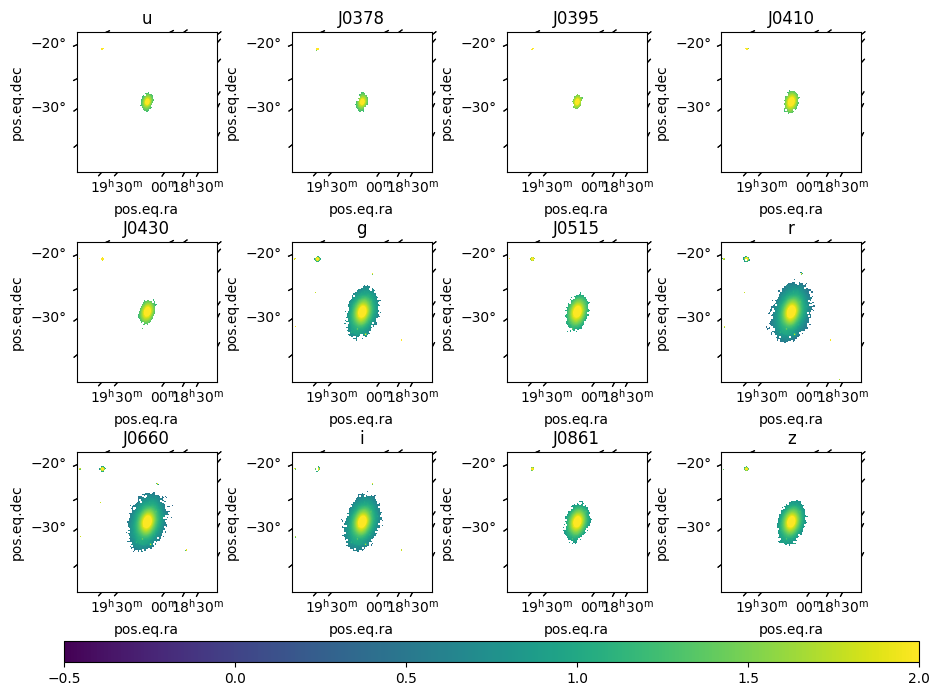

In [5]:
import numpy as np
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from splusdata.vars import BANDS

wcs = WCS(scube.cube[0].header, naxis=(1, 2))

logflux__byx = np.ma.log10(scube.flam__byx.value)

f = plt.figure()
f.set_size_inches(9, 7)

# plot bands
for i, band in enumerate(BANDS):
    ax = f.add_subplot(3, 4, i+1, projection=wcs)
    ax.set_title(band)
    logflux__yx = logflux__byx[i]
    im = ax.imshow(logflux__yx, origin='lower', vmin=-0.5, vmax=2)

f.subplots_adjust(left=0.05, right=0.95, bottom=0.15, top=0.95, wspace=0.3, hspace=0.5)
left, bottom, width, height = 0.05, 0.05, 0.95, 0.03
cb_ax = f.add_axes([left, bottom, width, height])
f.colorbar(im, cax=cb_ax, location='bottom')

## Lupton RGB

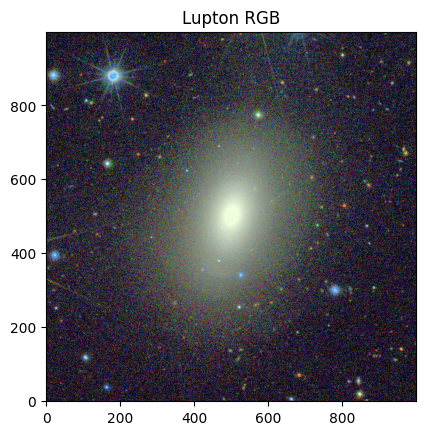

In [6]:
from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb

R__yx = scube.flam__byx[BANDS.index('i')]
G__yx = scube.flam__byx[BANDS.index('r')]
B__yx = scube.flam__byx[BANDS.index('g')]

RGB__yxc = make_lupton_rgb(R__yx, G__yx, B__yx, stretch=3)

plt.title('Lupton RGB')
plt.imshow(RGB__yxc, origin='lower')